In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [127]:
df1=pd.read_csv("Farm_product.csv",index_col="Period",parse_dates=True)
df2=pd.read_csv("Groceries_related_product.csv",index_col="Period",parse_dates=True)
df3=pd.read_csv("HouseHold_appliances.csv",index_col="Period",parse_dates=True)
df4=pd.read_csv("Motor_vehicles.csv",index_col="Period",parse_dates=True)

In [128]:
print(len(df1),len(df2),len(df3),len(df4))

396 396 396 396


In [129]:
merged_df=pd.DataFrame()
merged_df['FARM']=df1
merged_df['GROCERY']=df2
merged_df['HouseHold']=df3
merged_df['MOTOR']=df4
merged_df.head()

,FARM,GROCERY,HouseHold,MOTOR
Period,,,,
Jan-92,"8,841","22,849","9,472","12,652"
Feb-92,"8,908","23,062","9,460","12,942"
Mar-92,"9,130","23,047","9,317","13,032"
Apr-92,"8,902","22,925","9,309","12,876"
May-92,"8,955","22,511","9,104","12,821"


In [130]:
for i in range(len(merged_df)):
    if not pd.isnull(merged_df['FARM'][i]) :
        merged_df['FARM'][i]=merged_df['FARM'][i].replace(',','')
    if not pd.isnull(merged_df['GROCERY'][i]):
        merged_df['GROCERY'][i]=merged_df['GROCERY'][i].replace(',','')
    if not pd.isnull(merged_df['HouseHold'][i]):
        merged_df['HouseHold'][i]=merged_df['HouseHold'][i].replace(',','')
    if  not pd.isnull(merged_df['MOTOR'][i]):
        merged_df['MOTOR'][i]=merged_df['MOTOR'][i].replace(',','')

In [131]:
merged_df=merged_df.astype('float')

In [132]:
merged_df=merged_df[:-10]

<Axes: xlabel='Period'>

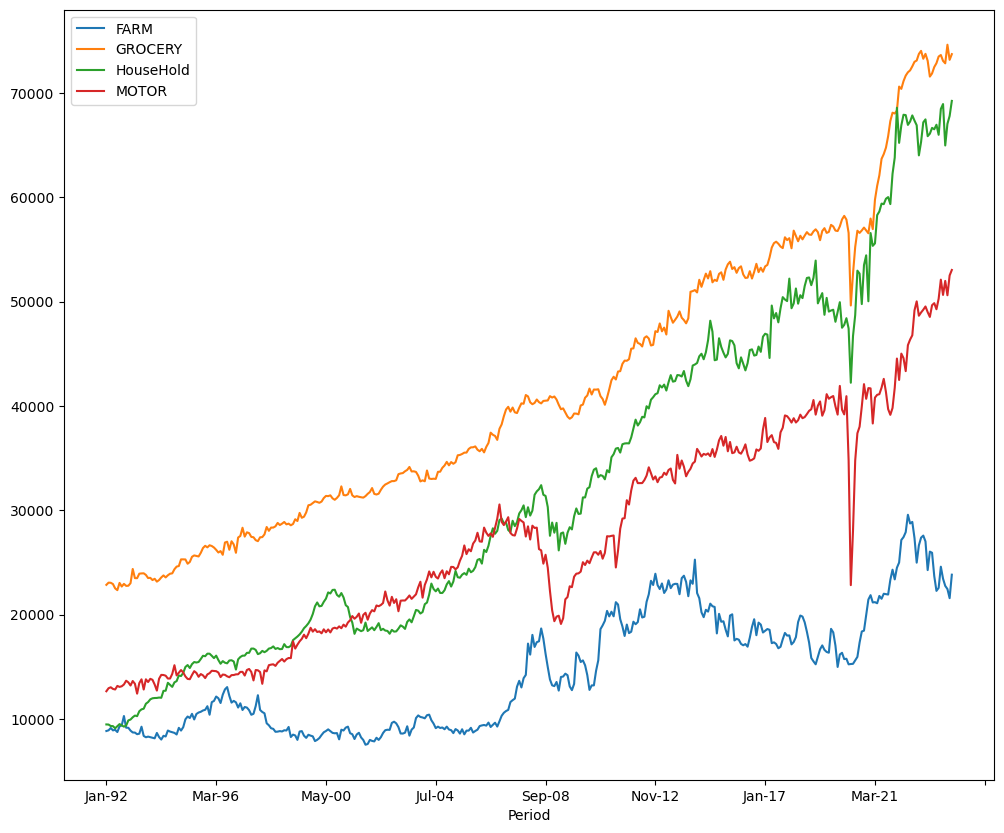

In [133]:
merged_df.plot(figsize=(12,10))


<Axes: xlabel='FARM', ylabel='Count'>

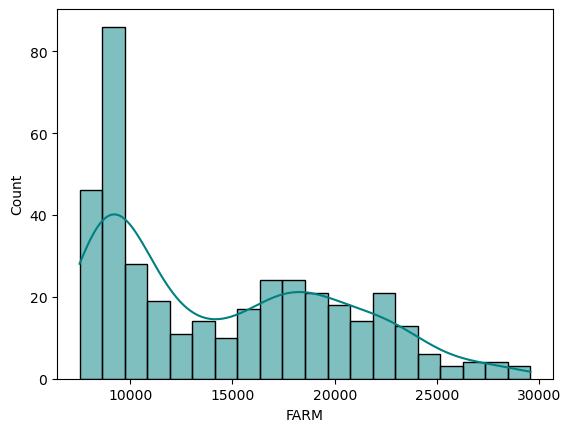

In [191]:

import seaborn as sns
sns.histplot(merged_df['FARM'], kde=True, bins=20, color='teal') 

1.The most frequent trading of raw materials falls between 9000 and 10000.
2.The distribution appears to be right-skewed, meaning there are more trading of raw material in lower end than on the higher end.
3.Data doesn't follow a normal distribution

<Axes: xlabel='GROCERY', ylabel='Count'>

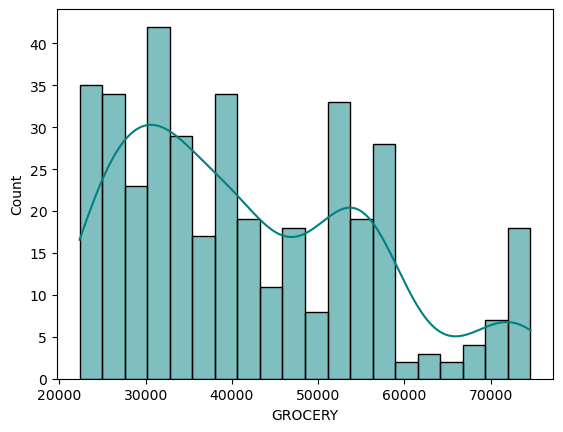

In [135]:
sns.histplot(merged_df['GROCERY'], kde=True, bins=20, color='teal') 

1.The most frequent production of grocery falls between 20000 and 60000.
2.The distribution appears to be right-skewed, or can say unimodal. 
3.Data doesn't follow a normal distribution

<Axes: xlabel='HouseHold', ylabel='Count'>

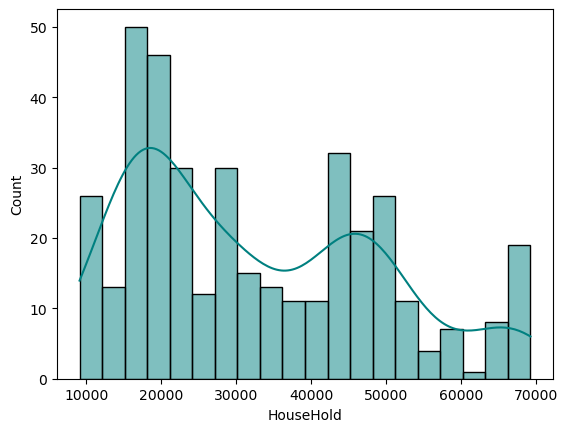

In [136]:
sns.histplot(merged_df['HouseHold'], kde=True, bins=20, color='teal') 

<Axes: xlabel='MOTOR', ylabel='Count'>

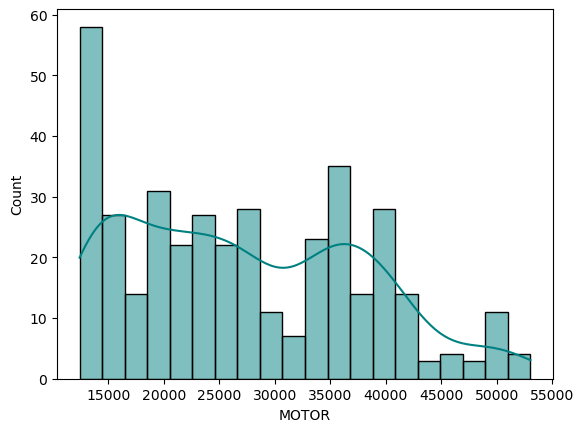

In [137]:
sns.histplot(merged_df['MOTOR'], kde=True, bins=20, color='teal') 

In [138]:
from statsmodels.tsa.api import VAR

In [139]:
len(merged_df)

386

In [140]:
from statsmodels.tsa.stattools import grangercausalitytests

In [141]:
grangercausalitytests(merged_df[['FARM','GROCERY']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5327  , p=0.0192  , df_denom=382, df_num=1
ssr based chi2 test:   chi2=5.5761  , p=0.0182  , df=1
likelihood ratio test: chi2=5.5361  , p=0.0186  , df=1
parameter F test:         F=5.5327  , p=0.0192  , df_denom=382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4834  , p=0.0848  , df_denom=379, df_num=2
ssr based chi2 test:   chi2=5.0324  , p=0.0808  , df=2
likelihood ratio test: chi2=4.9997  , p=0.0821  , df=2
parameter F test:         F=2.4834  , p=0.0848  , df_denom=379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.6853  , p=0.0032  , df_denom=376, df_num=3
ssr based chi2 test:   chi2=14.3177 , p=0.0025  , df=3
likelihood ratio test: chi2=14.0566 , p=0.0028  , df=3
parameter F test:         F=4.6853  , p=0.0032  , df_denom=376, df_num=3


In [142]:
grangercausalitytests(merged_df[['FARM','HouseHold']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.2964  , p=0.0072  , df_denom=382, df_num=1
ssr based chi2 test:   chi2=7.3537  , p=0.0067  , df=1
likelihood ratio test: chi2=7.2843  , p=0.0070  , df=1
parameter F test:         F=7.2964  , p=0.0072  , df_denom=382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3607  , p=0.0357  , df_denom=379, df_num=2
ssr based chi2 test:   chi2=6.8100  , p=0.0332  , df=2
likelihood ratio test: chi2=6.7503  , p=0.0342  , df=2
parameter F test:         F=3.3607  , p=0.0357  , df_denom=379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.7128  , p=0.0118  , df_denom=376, df_num=3
ssr based chi2 test:   chi2=11.3458 , p=0.0100  , df=3
likelihood ratio test: chi2=11.1810 , p=0.0108  , df=3
parameter F test:         F=3.7128  , p=0.0118  , df_denom=376, df_num=3


In [143]:
grangercausalitytests(merged_df[['HouseHold','MOTOR']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2339  , p=0.6289  , df_denom=382, df_num=1
ssr based chi2 test:   chi2=0.2358  , p=0.6273  , df=1
likelihood ratio test: chi2=0.2357  , p=0.6273  , df=1
parameter F test:         F=0.2339  , p=0.6289  , df_denom=382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.1599 , p=0.0000  , df_denom=379, df_num=2
ssr based chi2 test:   chi2=24.6406 , p=0.0000  , df=2
likelihood ratio test: chi2=23.8823 , p=0.0000  , df=2
parameter F test:         F=12.1599 , p=0.0000  , df_denom=379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.4212 , p=0.0000  , df_denom=376, df_num=3
ssr based chi2 test:   chi2=31.8456 , p=0.0000  , df=3
likelihood ratio test: chi2=30.5908 , p=0.0000  , df=3
parameter F test:         F=10.4212 , p=0.0000  , df_denom=376, df_num=3


In [144]:
grangercausalitytests(merged_df[['HouseHold','GROCERY']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.4410 , p=0.0008  , df_denom=382, df_num=1
ssr based chi2 test:   chi2=11.5308 , p=0.0007  , df=1
likelihood ratio test: chi2=11.3615 , p=0.0007  , df=1
parameter F test:         F=11.4410 , p=0.0008  , df_denom=382, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.5231  , p=0.0016  , df_denom=379, df_num=2
ssr based chi2 test:   chi2=13.2183 , p=0.0013  , df=2
likelihood ratio test: chi2=12.9959 , p=0.0015  , df=2
parameter F test:         F=6.5231  , p=0.0016  , df_denom=379, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.0157  , p=0.0020  , df_denom=376, df_num=3
ssr based chi2 test:   chi2=15.3273 , p=0.0016  , df=3
likelihood ratio test: chi2=15.0286 , p=0.0018  , df=3
parameter F test:         F=5.0157  , p=0.0020  , df_denom=376, df_num=3


In [145]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [146]:
merged_df.head()

,FARM,GROCERY,HouseHold,MOTOR
Period,,,,
Jan-92,8841.0,22849.0,9472.0,12652.0
Feb-92,8908.0,23062.0,9460.0,12942.0
Mar-92,9130.0,23047.0,9317.0,13032.0
Apr-92,8902.0,22925.0,9309.0,12876.0
May-92,8955.0,22511.0,9104.0,12821.0


In [147]:
adf_test(merged_df['FARM'],title='FARM')

Augmented Dickey-Fuller Test: FARM
ADF test statistic       -0.681572
p-value                   0.851465
# lags used              12.000000
# observations          373.000000
critical value (1%)      -3.448004
critical value (5%)      -2.869320
critical value (10%)     -2.570915
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [148]:
adf_test(merged_df['GROCERY'],title='GROCERY')

Augmented Dickey-Fuller Test: GROCERY
ADF test statistic        1.225714
p-value                   0.996159
# lags used              12.000000
# observations          373.000000
critical value (1%)      -3.448004
critical value (5%)      -2.869320
critical value (10%)     -2.570915
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [149]:
adf_test(merged_df['HouseHold'],title='HouseHold')

Augmented Dickey-Fuller Test: HouseHold
ADF test statistic        1.341058
p-value                   0.996829
# lags used              17.000000
# observations          368.000000
critical value (1%)      -3.448245
critical value (5%)      -2.869426
critical value (10%)     -2.570971
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [150]:
adf_test(merged_df['MOTOR'],title='MOTOR')

Augmented Dickey-Fuller Test: MOTOR
ADF test statistic        0.689549
p-value                   0.989627
# lags used               5.000000
# observations          380.000000
critical value (1%)      -3.447676
critical value (5%)      -2.869176
critical value (10%)     -2.570838
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Based on the Granger causality tests, we can assess the causal relationships between the variables. For example, if FARM Granger causes GROCERY but not vice versa, it suggests that changes in FARM prices precede changes in GROCERY prices.
The non-stationarity of the series indicates that they may exhibit trends or other non-random patterns over time. This can affect the modeling and forecasting of the series.
Further analysis, such as examining the correlation between the series or exploring multivariate time series models, may provide additional insights into their relationships and dynamics.

In [151]:
df_transformed = merged_df.diff()

In [152]:
adf_test(df_transformed['FARM'],title='FARM')

Augmented Dickey-Fuller Test: FARM
ADF test statistic       -3.572612
p-value                   0.006307
# lags used              17.000000
# observations          367.000000
critical value (1%)      -3.448294
critical value (5%)      -2.869448
critical value (10%)     -2.570983
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [153]:
adf_test(df_transformed['GROCERY'],title='GROCERY')

Augmented Dickey-Fuller Test: GROCERY
ADF test statistic       -4.678989
p-value                   0.000092
# lags used              11.000000
# observations          373.000000
critical value (1%)      -3.448004
critical value (5%)      -2.869320
critical value (10%)     -2.570915
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [154]:
adf_test(df_transformed['HouseHold'],title='HouseHold')

Augmented Dickey-Fuller Test: HouseHold
ADF test statistic       -4.521687
p-value                   0.000180
# lags used              17.000000
# observations          367.000000
critical value (1%)      -3.448294
critical value (5%)      -2.869448
critical value (10%)     -2.570983
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [155]:
adf_test(df_transformed['MOTOR'],title='MOTOR')

Augmented Dickey-Fuller Test: MOTOR
ADF test statistic     -1.145168e+01
p-value                 5.837590e-21
# lags used             4.000000e+00
# observations          3.800000e+02
critical value (1%)    -3.447676e+00
critical value (5%)    -2.869176e+00
critical value (10%)   -2.570838e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [156]:
df_transformed.head()

,FARM,GROCERY,HouseHold,MOTOR
Period,,,,
Jan-92,NaN,NaN,NaN,NaN
Feb-92,67.0,213.0,-12.0,290.0
Mar-92,222.0,-15.0,-143.0,90.0
Apr-92,-228.0,-122.0,-8.0,-156.0
May-92,53.0,-414.0,-205.0,-55.0


In [157]:
df_transformed=df_transformed.dropna()

In [158]:
df_transformed.head()

,FARM,GROCERY,HouseHold,MOTOR
Period,,,,
Feb-92,67.0,213.0,-12.0,290.0
Mar-92,222.0,-15.0,-143.0,90.0
Apr-92,-228.0,-122.0,-8.0,-156.0
May-92,53.0,-414.0,-205.0,-55.0
Jun-92,-212.0,-169.0,192.0,341.0


In [159]:
len(df_transformed)

385

In [160]:
train=df_transformed[:-12]
test=merged_df[-12:]
print(len(train))
print(len(test))

373
12


In [161]:
model = VAR(train)
for i in [1,2,3,4,5,6,7]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()
#p=1 and p=2

Order = 1
AIC:  53.922958213517774
BIC:  54.13365143148945

Order = 2
AIC:  53.79475469098079
BIC:  54.17476351646292

Order = 3
AIC:  53.80155214444218
BIC:  54.35155797226161

Order = 4
AIC:  53.82413901488131
BIC:  54.54482782733322

Order = 5
AIC:  53.83630866457713
BIC:  54.72837107437656

Order = 6
AIC:  53.84857359278642
BIC:  54.912704886534264

Order = 7
AIC:  53.870060019032884
BIC:  55.106960201203805



/Users/simantinighosh/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [162]:
results1=model.fit(1)
results1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 10, Apr, 2024
Time:                     22:49:21
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    54.1337
Nobs:                     372.000    HQIC:                   54.0066
Log likelihood:          -12121.1    FPE:                2.62087e+23
AIC:                      53.9230    Det(Omega_mle):     2.48458e+23
--------------------------------------------------------------------
Results for equation FARM
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               41.511979        41.194784            1.008           0.314
L1.FARM             -0.048882         0.052211           -0.936           0.349
L1.GROCERY           0.095655         0.067950            1.408  

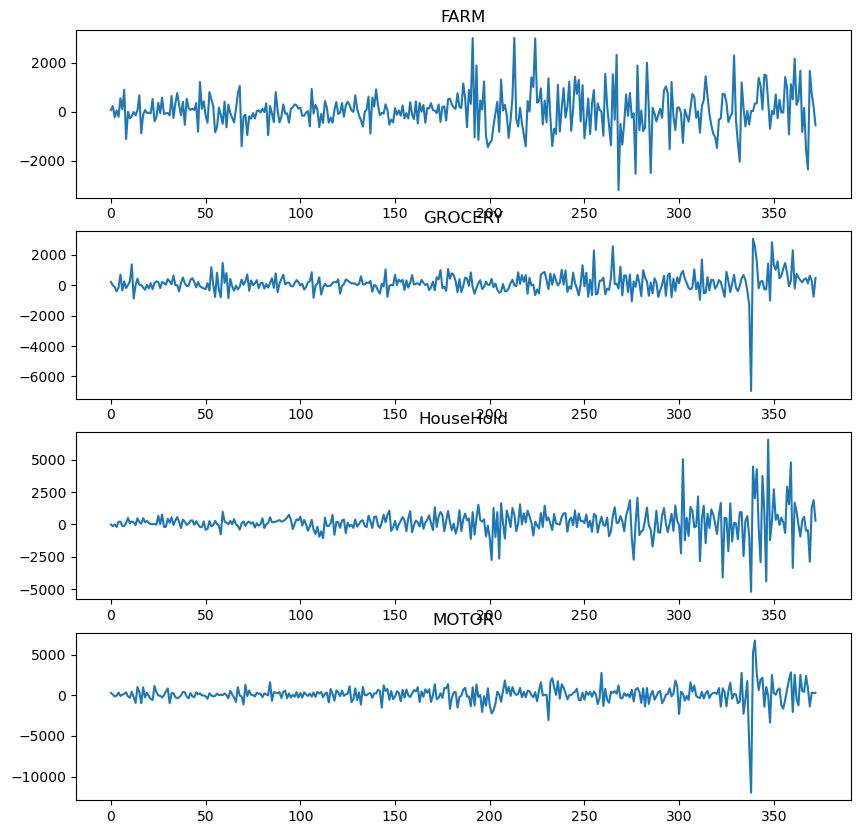

In [163]:
results1.plot();

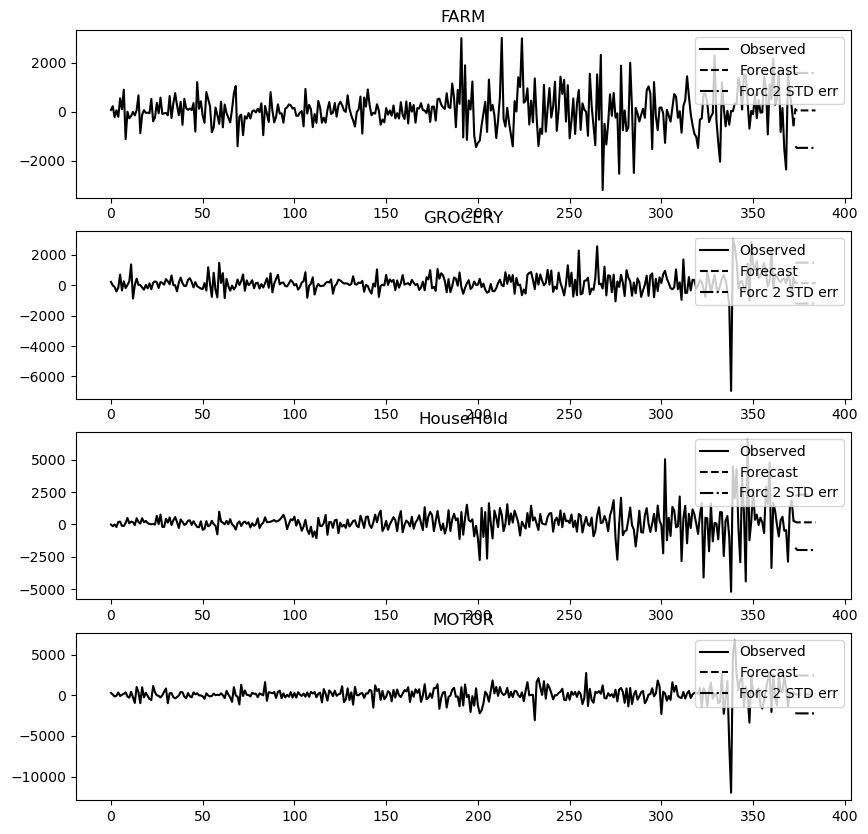

In [164]:
results1.plot_forecast(12);

In [165]:
lag_order=results1.k_ar
lag_order

1

In [166]:
z1=results1.forecast(y=train.values[-lag_order:],steps=12)
print(z1)

[[ 99.60706563 130.1313091  192.7202835  125.24279188]
 [ 44.72336838 136.75415686 146.00135904  93.59336747]
 [ 49.18080782 136.08184139 158.70447362  99.53809602]
 [ 48.75854199 136.22100196 154.84079825  97.98583971]
 [ 48.8187311  136.17954259 156.06156768  98.45647085]
 [ 48.80480128 136.19297008 155.67188877  98.30762761]
 [ 48.80891939 136.18860269 155.79661678  98.35518662]
 [ 48.80761655 136.19001461 155.75666393  98.33995533]
 [ 48.80803414 136.18956019 155.76946443  98.34483557]
 [ 48.80790012 136.1897061  155.76536299  98.34327179]
 [ 48.80794311 136.1896593  155.76667718  98.34377287]
 [ 48.80792933 136.1896743  155.76625608  98.34361231]]


In [167]:
idx=merged_df.index[-12:]

In [168]:
df_forecast_p1 = pd.DataFrame(z1, index=idx, columns=['Forecasted_FARM_diff','Forecasted_GROCERY_diff','Forecasted_HouseHold_diff','Forecasted_MOTOR_diff'])
df_forecast_p1

,Forecasted_FARM_diff,Forecasted_GROCERY_diff,Forecasted_HouseHold_diff,Forecasted_MOTOR_diff
Period,,,,
Mar-23,99.607066,130.131309,192.720284,125.242792
Apr-23,44.723368,136.754157,146.001359,93.593367
May-23,49.180808,136.081841,158.704474,99.538096
Jun-23,48.758542,136.221002,154.840798,97.985840
Jul-23,48.818731,136.179543,156.061568,98.456471
Aug-23,48.804801,136.192970,155.671889,98.307628
Sep-23,48.808919,136.188603,155.796617,98.355187
Oct-23,48.807617,136.190015,155.756664,98.339955
Nov-23,48.808034,136.189560,155.769464,98.344836


In [169]:
# Now build the forecast values from the first difference set
df_forecast_p1['Farm_Forecast'] = merged_df['FARM'].iloc[-13] + df_forecast_p1['Forecasted_FARM_diff'].cumsum()
df_forecast_p1['GROCERY_Forecast'] = merged_df['GROCERY'].iloc[-13] + df_forecast_p1['Forecasted_GROCERY_diff'].cumsum()
df_forecast_p1['Household_Forecast'] = merged_df['HouseHold'].iloc[-13] + df_forecast_p1['Forecasted_HouseHold_diff'].cumsum()
df_forecast_p1['Motor_Forecast'] = merged_df['MOTOR'].iloc[-13] + df_forecast_p1['Forecasted_MOTOR_diff'].cumsum()
df_forecast_p1.head()

,Forecasted_FARM_diff,Forecasted_GROCERY_diff,Forecasted_HouseHold_diff,Forecasted_MOTOR_diff,Farm_Forecast,GROCERY_Forecast,Household_Forecast,Motor_Forecast
Period,,,,,,,,
Mar-23,99.607066,130.131309,192.720284,125.242792,27109.607066,73873.131309,67653.720284,49655.242792
Apr-23,44.723368,136.754157,146.001359,93.593367,27154.330434,74009.885466,67799.721643,49748.836159
May-23,49.180808,136.081841,158.704474,99.538096,27203.511242,74145.967307,67958.426116,49848.374255
Jun-23,48.758542,136.221002,154.840798,97.985840,27252.269784,74282.188309,68113.266914,49946.360095
Jul-23,48.818731,136.179543,156.061568,98.456471,27301.088515,74418.367852,68269.328482,50044.816566


The VAR model coefficients provide information about the relationships between the variables at lag 1.
For example, in the FARM equation, the coefficients for the lagged variables indicate how changes in each variable affect the current value of FARM.

The correlation matrix of residuals provides insights into the linear relationships between the residuals of different series.
For example, a higher correlation between residuals of two series suggests a stronger linear relationship between them.
Forecasted differences and cumulative forecasts are provided for each series for future periods.
These forecasts can be used to anticipate the behavior of the variables and make informed decisions.

In [170]:
score1=rmse(test['FARM'],df_forecast_p1['Farm_Forecast'])
score2=rmse(test['GROCERY'],df_forecast_p1['GROCERY_Forecast'])
score3=rmse(test['HouseHold'],df_forecast_p1['Household_Forecast'])
score4=rmse(test['MOTOR'],df_forecast_p1['Motor_Forecast'])
print("RMSE Of FARM Values for p=1",score1)
print("RMSE Of GROCERY Values for p=1",score2)
print("RMSE Of HouseHold Values for p=1",score3)
print("RMSE Of MOTOR Values for p=1",score4)

RMSE Of FARM Values for p=1 4033.619704145214
RMSE Of GROCERY Values for p=1 1700.4214315984816
RMSE Of HouseHold Values for p=1 1819.5998226137967
RMSE Of MOTOR Values for p=1 1199.9814763512725


In [171]:
# next forecasted point
fcast1=results1.forecast(y=merged_df.values[-lag_order:],steps=1)
fcast1

array([[ 3845.19472635, -7813.85692895, -4522.16532618,   248.05481684]])

In [172]:
idx = ['Mar-24']
fcast_point_p1 = pd.DataFrame(fcast1, index=idx, columns=['Forecasted_FARM_diff','Forecasted_GROCERY_diff','Forecasted_HouseHold_diff','Forecasted_MOTOR_diff'])
fcast_point_p1

,Forecasted_FARM_diff,Forecasted_GROCERY_diff,Forecasted_HouseHold_diff,Forecasted_MOTOR_diff
Mar-24,3845.194726,-7813.856929,-4522.165326,248.054817


In [173]:
# Now build the forecast values from the first difference set
fcast_point_p1['Farm_Forecast'] = merged_df['FARM'].iloc[-2] + fcast_point_p1['Forecasted_FARM_diff'].cumsum()
fcast_point_p1['GROCERY_Forecast'] = merged_df['GROCERY'].iloc[-2] + fcast_point_p1['Forecasted_GROCERY_diff'].cumsum()
fcast_point_p1['Household_Forecast'] = merged_df['HouseHold'].iloc[-2] + fcast_point_p1['Forecasted_HouseHold_diff'].cumsum()
fcast_point_p1['Motor_Forecast'] = merged_df['MOTOR'].iloc[-2] + fcast_point_p1['Forecasted_MOTOR_diff'].cumsum()
fcast_point_p1.head()

,Forecasted_FARM_diff,Forecasted_GROCERY_diff,Forecasted_HouseHold_diff,Forecasted_MOTOR_diff,Farm_Forecast,GROCERY_Forecast,Household_Forecast,Motor_Forecast
Mar-24,3845.194726,-7813.856929,-4522.165326,248.054817,25419.194726,65355.143071,63263.834674,52750.054817


Implementation of VAR(p) model where p=2

In [174]:
results2=model.fit(2)
results2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 10, Apr, 2024
Time:                     22:49:59
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    54.1748
Nobs:                     371.000    HQIC:                   53.9457
Log likelihood:          -12048.6    FPE:                2.30559e+23
AIC:                      53.7948    Det(Omega_mle):     2.09480e+23
--------------------------------------------------------------------
Results for equation FARM
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               13.526844        42.303502            0.320           0.749
L1.FARM             -0.050986         0.052316           -0.975           0.330
L1.GROCERY           0.104403         0.069088            1.511  

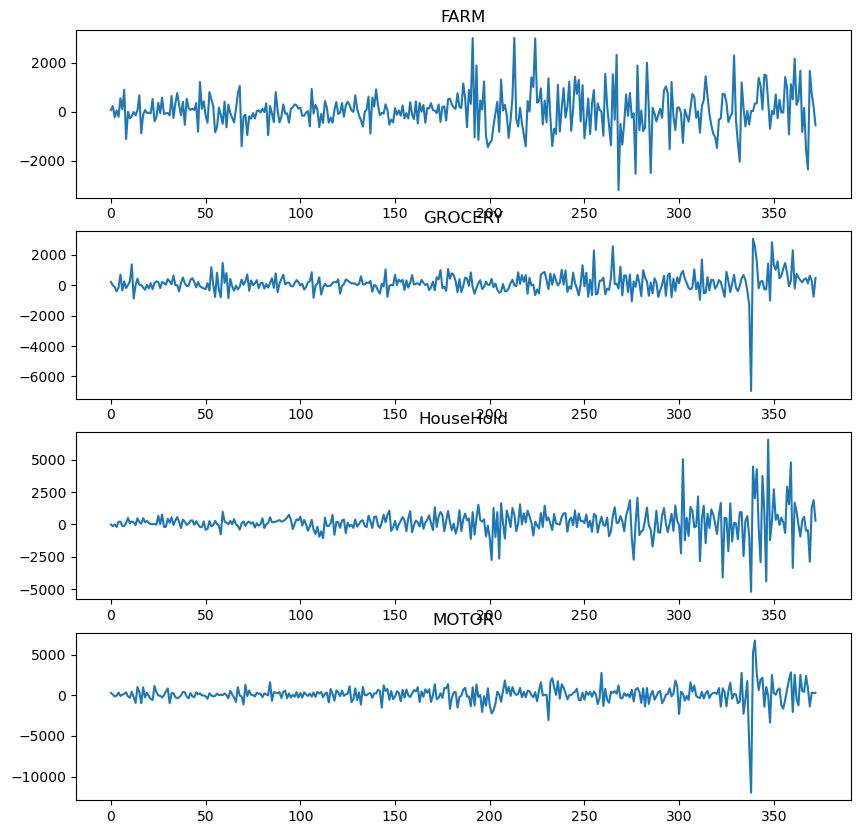

In [175]:
results2.plot();

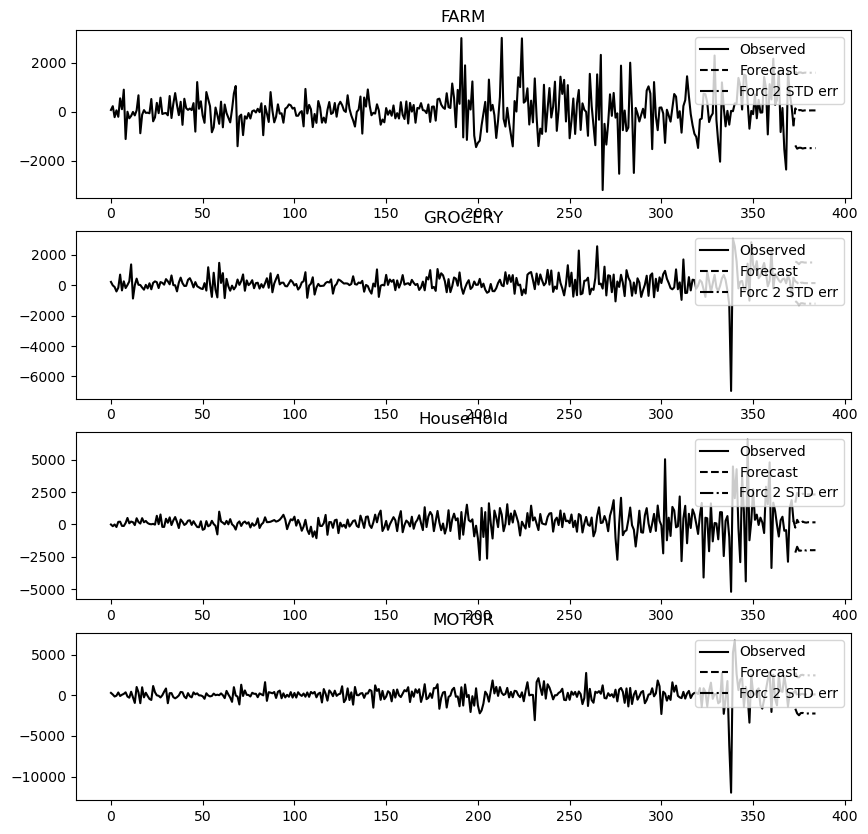

In [176]:
results2.plot_forecast(12);

In [177]:
lag_order=results2.k_ar
lag_order


2

In [178]:
z2=results2.forecast(y=train.values[-lag_order:],steps=12)
print(z2)

[[ 1.32066919e+02  2.53039627e+02 -2.52059117e+02  5.65398027e+02]
 [ 7.90932097e+00  1.75537489e+02  3.49856587e+02 -1.19202056e-01]
 [ 6.11281330e+01  2.78032975e+01  9.47496579e+01 -1.29152629e+02]
 [ 6.15296288e+01  1.59665984e+02  1.04584196e+02  1.45311651e+02]
 [ 3.25342820e+01  1.59853885e+02  2.17260612e+02  1.71400939e+02]
 [ 4.88465060e+01  1.31814119e+02  1.53898552e+02  7.67261506e+01]
 [ 5.40035606e+01  1.32287837e+02  1.32179424e+02  8.55904440e+01]
 [ 4.73102622e+01  1.38510589e+02  1.65493965e+02  1.05945084e+02]
 [ 4.71288097e+01  1.37027920e+02  1.58992118e+02  9.94995321e+01]
 [ 4.92633377e+01  1.37140618e+02  1.51861849e+02  9.89539223e+01]
 [ 4.84513982e+01  1.37182671e+02  1.56639767e+02  9.98334805e+01]
 [ 4.83347444e+01  1.36707172e+02  1.56354338e+02  9.86189850e+01]]


In [179]:
idx=merged_df.index[-12:]

In [180]:
df_forecast_p2 = pd.DataFrame(z2, index=idx, columns=['Forecasted_FARM_diff','Forecasted_GROCERY_diff','Forecasted_HouseHold_diff','Forecasted_MOTOR_diff'])
df_forecast_p2

,Forecasted_FARM_diff,Forecasted_GROCERY_diff,Forecasted_HouseHold_diff,Forecasted_MOTOR_diff
Period,,,,
Mar-23,132.066919,253.039627,-252.059117,565.398027
Apr-23,7.909321,175.537489,349.856587,-0.119202
May-23,61.128133,27.803298,94.749658,-129.152629
Jun-23,61.529629,159.665984,104.584196,145.311651
Jul-23,32.534282,159.853885,217.260612,171.400939
Aug-23,48.846506,131.814119,153.898552,76.726151
Sep-23,54.003561,132.287837,132.179424,85.590444
Oct-23,47.310262,138.510589,165.493965,105.945084
Nov-23,47.128810,137.027920,158.992118,99.499532


In [181]:
# Now build the forecast values from the first difference set
df_forecast_p2['Farm_Forecast'] = merged_df['FARM'].iloc[-13] + df_forecast_p2['Forecasted_FARM_diff'].cumsum()
df_forecast_p2['GROCERY_Forecast'] = merged_df['GROCERY'].iloc[-13] + df_forecast_p2['Forecasted_GROCERY_diff'].cumsum()
df_forecast_p2['Household_Forecast'] = merged_df['HouseHold'].iloc[-13] + df_forecast_p2['Forecasted_HouseHold_diff'].cumsum()
df_forecast_p2['Motor_Forecast'] = merged_df['MOTOR'].iloc[-13] + df_forecast_p2['Forecasted_MOTOR_diff'].cumsum()
df_forecast_p2.head()

,Forecasted_FARM_diff,Forecasted_GROCERY_diff,Forecasted_HouseHold_diff,Forecasted_MOTOR_diff,Farm_Forecast,GROCERY_Forecast,Household_Forecast,Motor_Forecast
Period,,,,,,,,
Mar-23,132.066919,253.039627,-252.059117,565.398027,27142.066919,73996.039627,67208.940883,50095.398027
Apr-23,7.909321,175.537489,349.856587,-0.119202,27149.976240,74171.577116,67558.797470,50095.278824
May-23,61.128133,27.803298,94.749658,-129.152629,27211.104373,74199.380414,67653.547128,49966.126196
Jun-23,61.529629,159.665984,104.584196,145.311651,27272.634001,74359.046397,67758.131324,50111.437846
Jul-23,32.534282,159.853885,217.260612,171.400939,27305.168283,74518.900282,67975.391936,50282.838786


In [182]:
score1=rmse(test['FARM'],df_forecast_p2['Farm_Forecast'])
print('score for FARM for p=2',score1)
score2=rmse(test['GROCERY'],df_forecast_p2['GROCERY_Forecast'])
print('score for Grocery for p=2',score2)
score3=rmse(test['HouseHold'],df_forecast_p2['Household_Forecast'])
print('score for Household for p=2',score3)
score4=rmse(test['MOTOR'],df_forecast_p2['Motor_Forecast'])
print('score for MOTOR for p=2',score4)

score for FARM for p=2 4041.6870640614566
score for Grocery for p=2 1793.6258670932866
score for Household for p=2 1576.0010142731069
score for MOTOR for p=2 1171.7852558938755


In [183]:
# next forecasted point
fcast2=results2.forecast(y=merged_df.values[-lag_order:],steps=1)
fcast2

array([[17226.50998795, -5685.11002921, -4683.3894951 ,   877.97612173]])

In [184]:
idx = ['Mar-24']
fcast_point_p2 = pd.DataFrame(fcast2, index=idx, columns=['Forecasted_FARM_diff','Forecasted_GROCERY_diff','Forecasted_HouseHold_diff','Forecasted_MOTOR_diff'])
fcast_point_p2

,Forecasted_FARM_diff,Forecasted_GROCERY_diff,Forecasted_HouseHold_diff,Forecasted_MOTOR_diff
Mar-24,17226.509988,-5685.110029,-4683.389495,877.976122


In [185]:
# Now build the forecast values from the first difference set
fcast_point_p2['Farm_Forecast'] = merged_df['FARM'].iloc[-2] + fcast_point_p2['Forecasted_FARM_diff'].cumsum()
fcast_point_p2['GROCERY_Forecast'] = merged_df['GROCERY'].iloc[-2] + fcast_point_p2['Forecasted_GROCERY_diff'].cumsum()
fcast_point_p2['Household_Forecast'] = merged_df['HouseHold'].iloc[-2] + fcast_point_p2['Forecasted_HouseHold_diff'].cumsum()
fcast_point_p2['Motor_Forecast'] = merged_df['MOTOR'].iloc[-2] + fcast_point_p2['Forecasted_MOTOR_diff'].cumsum()
fcast_point_p2.head()

,Forecasted_FARM_diff,Forecasted_GROCERY_diff,Forecasted_HouseHold_diff,Forecasted_MOTOR_diff,Farm_Forecast,GROCERY_Forecast,Household_Forecast,Motor_Forecast
Mar-24,17226.509988,-5685.110029,-4683.389495,877.976122,38800.509988,67483.889971,63102.610505,53379.976122


These results provide insights into the performance of the forecasting model for each series at different values of p (the lag order). The RMSE values indicate the average error of the forecasts compared to the actual values. Lower RMSE values indicate better performance of the model in predicting the series.

Additionally, the forecasted point for each series provides a glimpse into the predicted values for the next time point based on the model. Comparing the forecasted values to the actual values can help evaluate the accuracy of the forecasting model.

Overall, these results can guide further analysis and decision-making based on the forecasting performance of the model for each series.

In [190]:
from sklearn.linear_model import MultiTaskLassoCV
import numpy as np

data = merged_df.values

# Fit a sparse VAR model using MultiTaskLassoCV
lasso_model = MultiTaskLassoCV(cv=5)  # Cross-validated Lasso regression
lasso_model.fit(data[:-1], data[1:])  # Fit on lagged data

# Get coefficients
coefficients = lasso_model.coef_

# Print coefficients
print("Coefficients:", coefficients)

Coefficients: [[ 0.88291908 -0.02790715  0.07772193 -0.02748433]
 [-0.01449541  0.75871717  0.19126348  0.03364221]
 [ 0.07886599  0.24081473  0.76114722  0.01702073]
 [-0.03020972  0.07141721  0.07057623  0.80983468]]


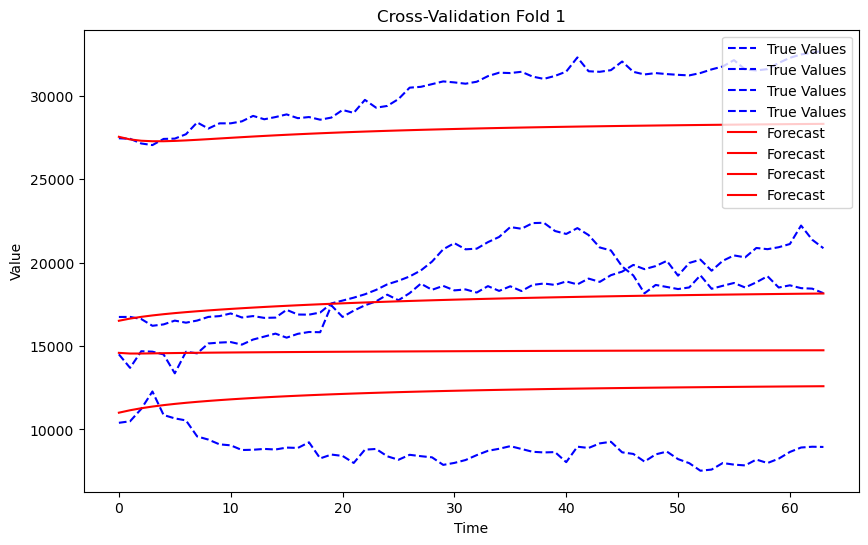

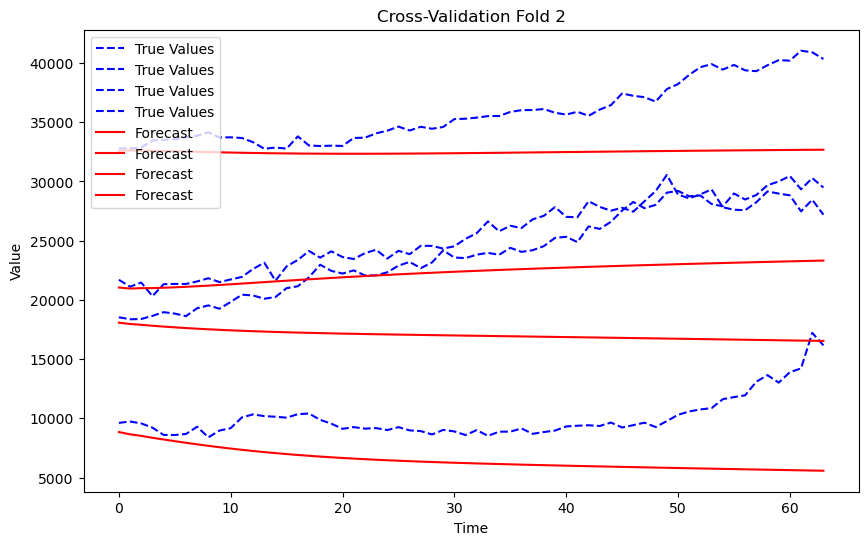

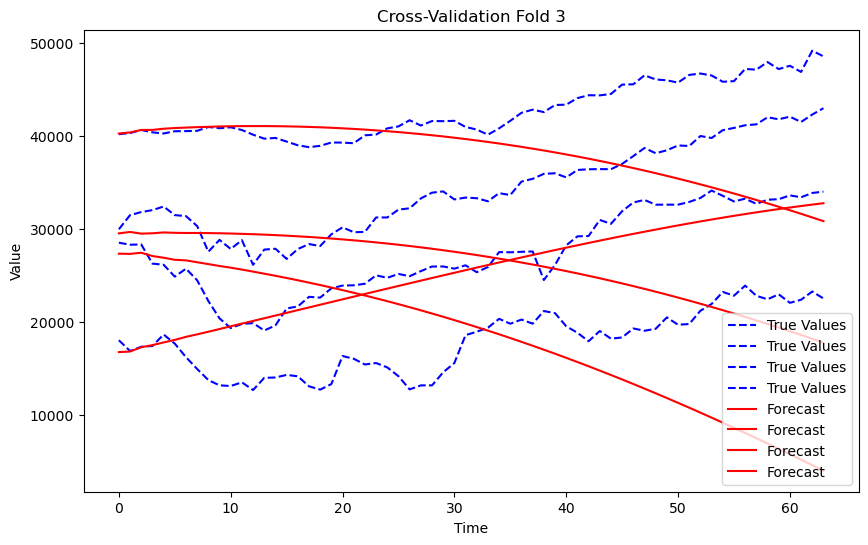

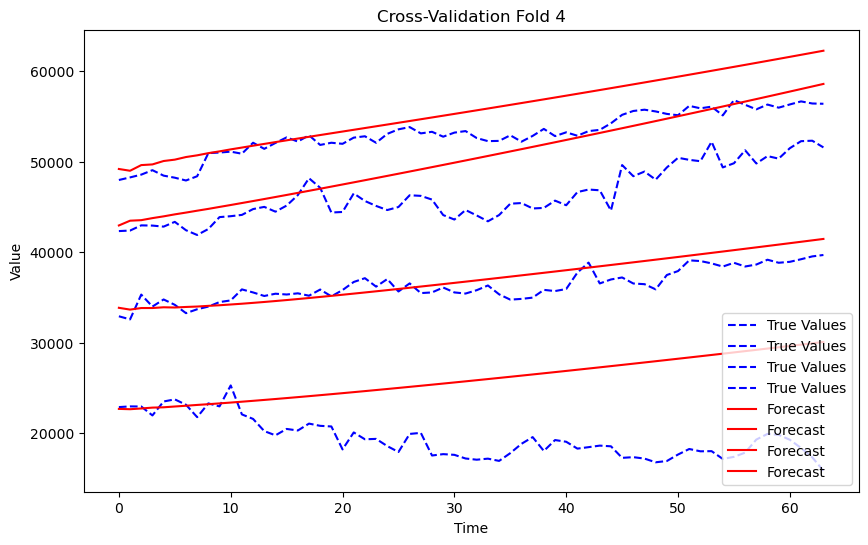

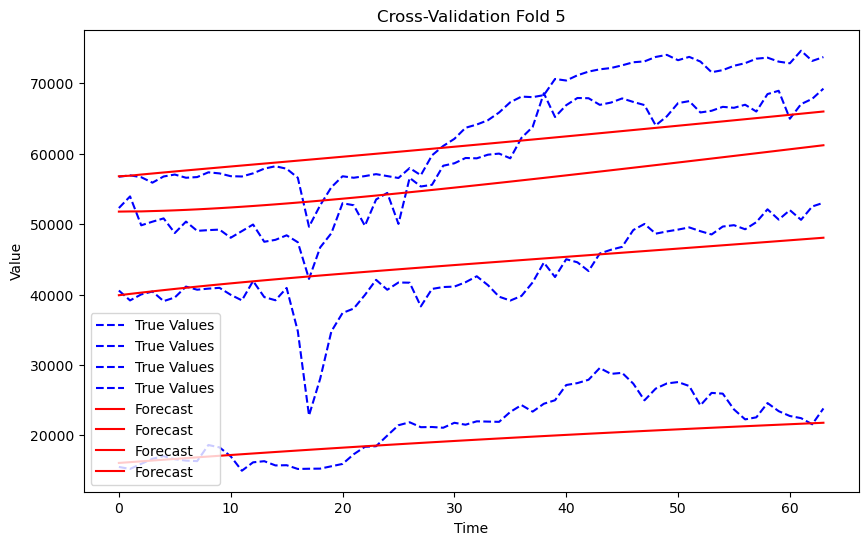

Forecast: [[23683.66432095 73416.99118704 69174.56266406 53111.37398553]]


In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.model_selection import TimeSeriesSplit

# Convert the DataFrame to a numpy array
data = merged_df.values

# Fit a VAR model
model = VAR(data)
result = model.fit(maxlags=4, ic='aic') 
# Perform cross-validation
n_splits = 5  # Number of splits for time series cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)
cv_results = []

for train_index, test_index in tscv.split(data):
    train_data, test_data = data[train_index], data[test_index]
    model = VAR(train_data)
    result = model.fit(maxlags=4, ic='aic')
    forecast = result.forecast(y=train_data, steps=len(test_data))
    cv_results.append((test_data, forecast))

# Plot the results
for i, (true_values, forecast) in enumerate(cv_results):
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values', linestyle='--', color='blue')
    plt.plot(forecast, label='Forecast', linestyle='-', color='red')
    plt.title(f'Cross-Validation Fold {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Perform forecasting
forecast_steps = 1
forecast = result.forecast(data[-result.k_ar:], steps=forecast_steps)
print("Forecast:", forecast)


As a alternative of BigVar sparse model have use MultiTaskLassoCV as it doesnt support in python.
The comparison between the MultiTaskLassoCV model and the VAR model with cross-validation reveals notable differences in their approaches and forecasting performances. The MultiTaskLassoCV model employs a sparse VAR framework, which estimates coefficients representing the relationships between variables while enforcing sparsity. In contrast, the VAR model utilizes traditional autoregressive modeling techniques with a maximum lag order selected via the Akaike Information Criterion (AIC). While the MultiTaskLassoCV model provides coefficients indicating variable relationships, the VAR model undergoes time series cross-validation to assess its forecasting accuracy. The VAR model's performance is evaluated through visual inspection of true versus forecasted values across multiple folds. Additionally, both models offer forecasts for future time steps. Ultimately, the choice between models may depend on factors such as interpretability versus predictive accuracy and computational efficiency, with each approach offering unique insights into the underlying dynamics of the time series data.

The performance of the series reveals distinct characteristics and trends. FARM and MOTOR exhibit higher volatility and variability compared to GROCERY and HouseHold. FARM shows fluctuations with occasional spikes, potentially indicating sensitivity to external factors such as weather or market conditions. GROCERY demonstrates relatively stable behavior with gradual fluctuations, reflecting consistent consumer demand. HouseHold displays moderate volatility with intermittent peaks and troughs, suggesting fluctuations in consumer spending patterns. MOTOR exhibits pronounced variability with occasional sharp changes, possibly influenced by factors like economic conditions or industry dynamics. Overall, while each series demonstrates unique behavior, they collectively reflect the diverse dynamics of agricultural, retail, household, and automotive sectors, with varying levels of sensitivity to external factors and economic conditions.